In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [67]:
df = pd.read_csv(r"raw\raw-video-game-sales.csv",
                 delimiter=",")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Data Exploration

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [69]:
df.duplicated().sum()

0

In [70]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## Unique Values

In [71]:
print(df['Name'].nunique())
# df['Name'].unique()

11493


In [72]:
print(df['Platform'].nunique())
df['Platform'].unique()

31


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [73]:
print(df['Genre'].nunique())
df['Genre'].unique()

12


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [74]:
print(df['Publisher'].nunique())
# df['Publisher'].unique()

578


## Missing Years

In [75]:
# % of sales with missing years to the total global sales
miss_year_sales = df['Global_Sales'].where(df['Year'].isna()).sum()
total_global_sales = df['Global_Sales'].sum()

(lambda m,t : (m/t)*100)(miss_year_sales,total_global_sales).round(2)

1.12

## Chart

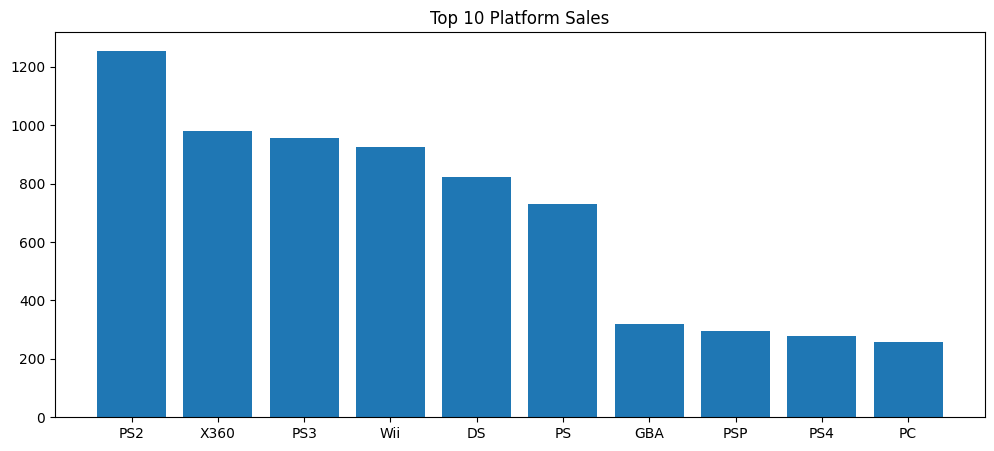

In [76]:
# Top 10 Platform by Global Sales
platform = df.groupby('Platform')['Global_Sales'].sum().reset_index()
top_platform = platform.sort_values(by='Global_Sales',ascending=False).head(10)

plt.figure(figsize=(12,5))
plt.bar(top_platform['Platform'],top_platform['Global_Sales'])
plt.title("Top 10 Platform Sales")
plt.show()

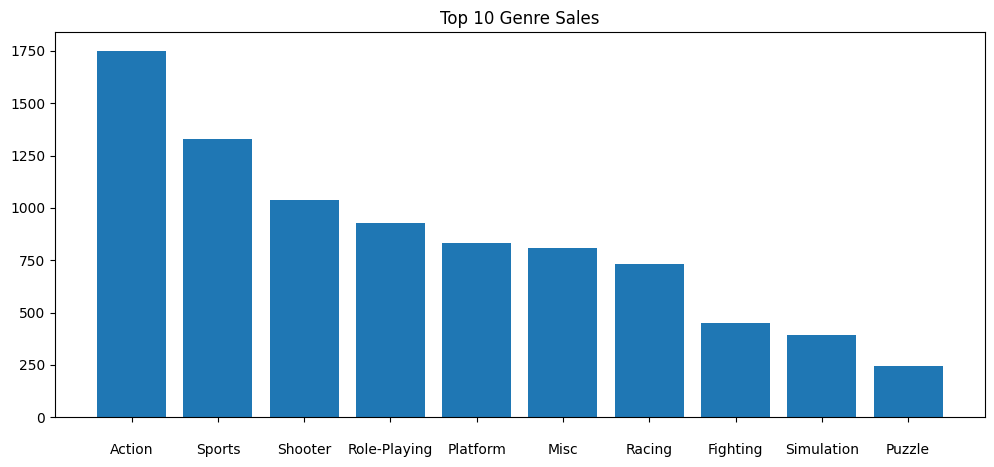

In [77]:
# Top 10 Genre by Global Sales
genre = df.groupby('Genre')['Global_Sales'].sum().reset_index()
top_genre = genre.sort_values(by='Global_Sales',ascending=False).head(10)

plt.figure(figsize=(12,5))
plt.bar(top_genre['Genre'],top_genre['Global_Sales'])
plt.title("Top 10 Genre Sales")
plt.tick_params(axis='x',pad=15)
plt.show()

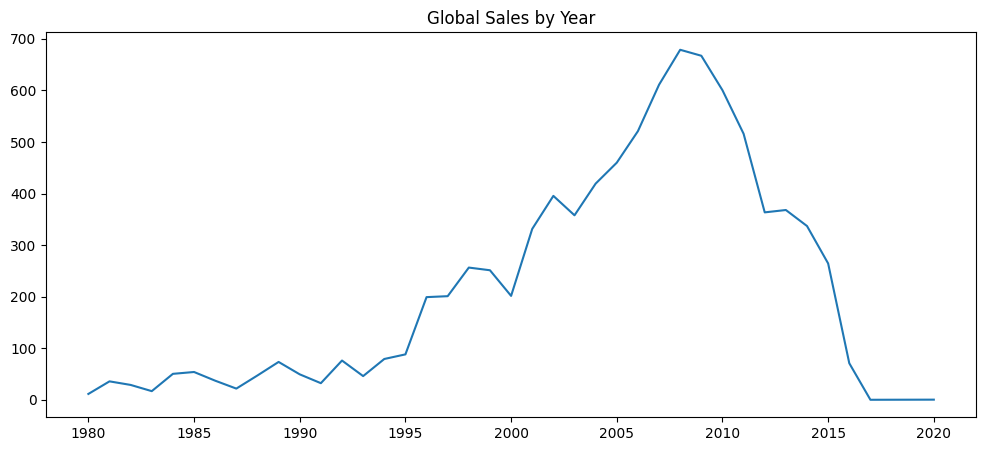

In [78]:
# Global Sales Trend
year_sales = df.groupby('Year')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(year_sales['Year'],year_sales['Global_Sales'])
plt.title("Global Sales by Year")
plt.show()

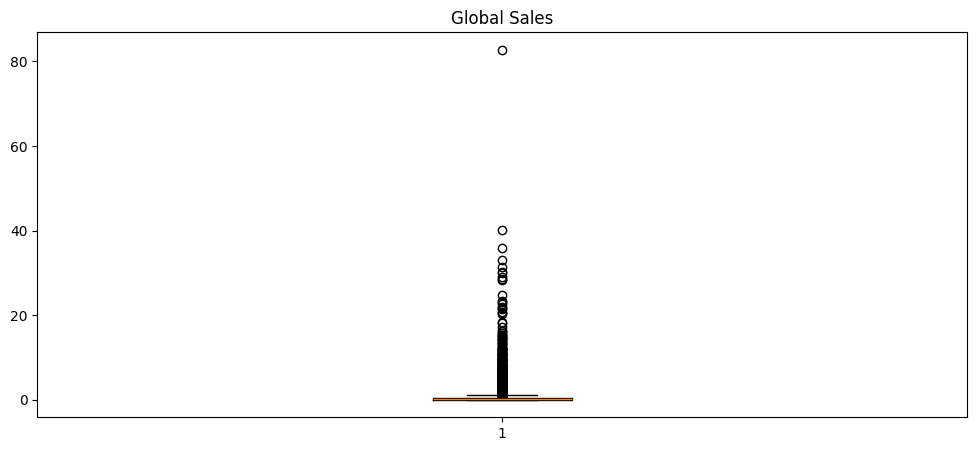

In [79]:
# Global Sales Outliers
plt.figure(figsize=(12,5))
plt.boxplot(df['Global_Sales'])
plt.title("Global Sales")
plt.show()

# Data Cleaning

In [80]:
df = df.drop(columns=['Rank','Name','Publisher'])

In [81]:
df['Genre'] = df['Genre'].str.replace('Role-Playing','RPG')

In [82]:
# Misc - no specific genre
df = df.where(~(df['Genre']=='Misc')).dropna()

In [83]:
# Action - general category (Shooter,Fighting,RPG...)
df = df.where(~(df['Genre']=='Action')).dropna()

In [84]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'RPG', 'Puzzle', 'Shooter',
       'Simulation', 'Fighting', 'Adventure', 'Strategy'], dtype=object)

## Intepolate Missing Years

In [85]:
df['Year'] = df['Year'].interpolate(method='linear').round().astype(int)
print(df['Year'].nunique())
df['Year'].unique()

39


array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 1990,
       1988, 2002, 2010, 2001, 2011, 1998, 2013, 2015, 2012, 2004, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 2000, 1995, 2016, 1981, 1987,
       1991, 1980, 1983, 1986, 2020, 2017])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11364 entries, 0 to 16597
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      11364 non-null  object 
 1   Year          11364 non-null  int32  
 2   Genre         11364 non-null  object 
 3   NA_Sales      11364 non-null  float64
 4   EU_Sales      11364 non-null  float64
 5   JP_Sales      11364 non-null  float64
 6   Other_Sales   11364 non-null  float64
 7   Global_Sales  11364 non-null  float64
dtypes: float64(5), int32(1), object(2)
memory usage: 754.6+ KB


In [87]:
df.isna().sum()

Platform        0
Year            0
Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [88]:
# not really duplicated, it has different game name which has been dropped
df.duplicated().sum()

1049

## Removing 3-Sigma Outliers

In [89]:
z_score = stats.zscore(df['Global_Sales'])
outliers =(z_score > 3)|(z_score < -3)
df = df[~outliers]

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11247 entries, 155 to 16597
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      11247 non-null  object 
 1   Year          11247 non-null  int32  
 2   Genre         11247 non-null  object 
 3   NA_Sales      11247 non-null  float64
 4   EU_Sales      11247 non-null  float64
 5   JP_Sales      11247 non-null  float64
 6   Other_Sales   11247 non-null  float64
 7   Global_Sales  11247 non-null  float64
dtypes: float64(5), int32(1), object(2)
memory usage: 746.9+ KB


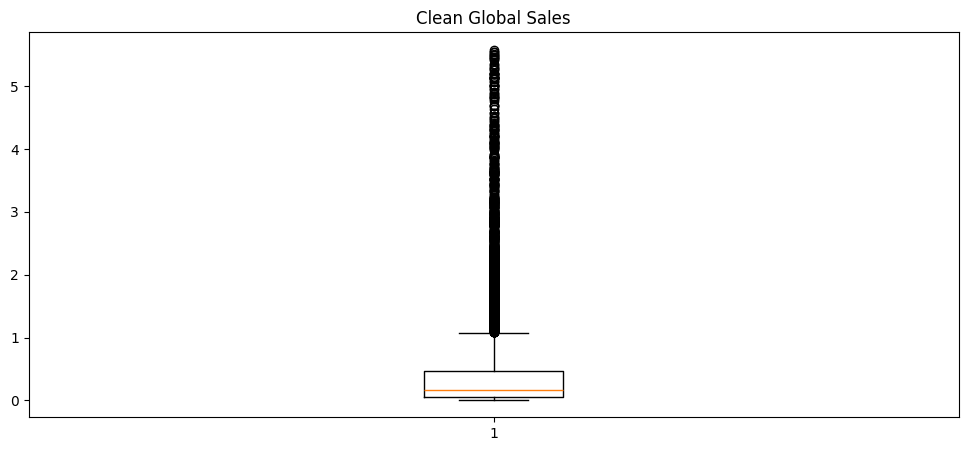

In [91]:
plt.figure(figsize=(12,5))
plt.boxplot(df['Global_Sales'])
plt.title("Clean Global Sales")
plt.show()

## Clean Chart

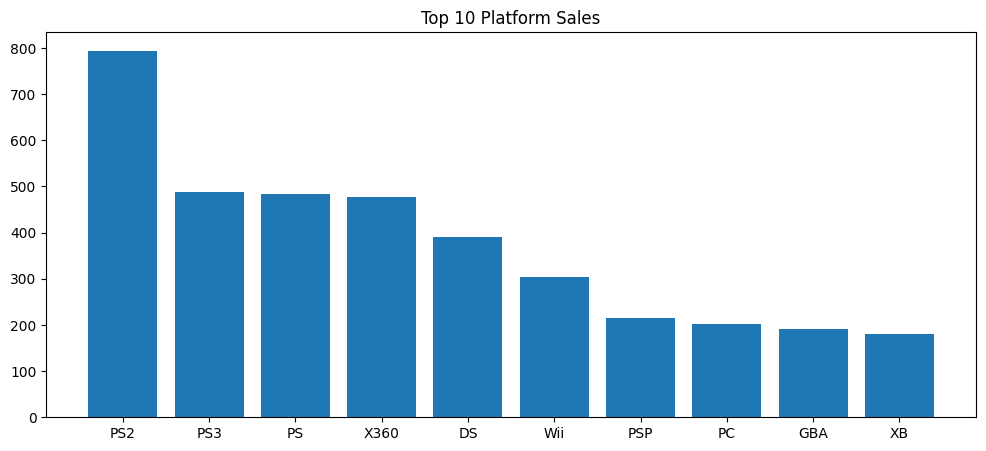

In [92]:
# Top 10 Platform by Global Sales
platform = df.groupby('Platform')['Global_Sales'].sum().reset_index()
top_platform = platform.sort_values(by='Global_Sales',ascending=False).head(10)

plt.figure(figsize=(12,5))
plt.bar(top_platform['Platform'],top_platform['Global_Sales'])
plt.title("Top 10 Platform Sales")
plt.show()

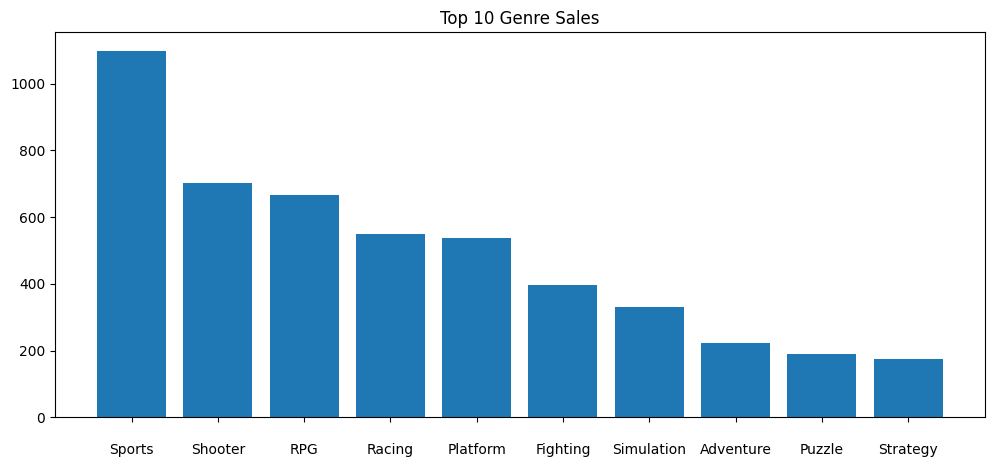

In [93]:
# Top 10 Genre by Global Sales
genre = df.groupby('Genre')['Global_Sales'].sum().reset_index()
top_genre = genre.sort_values(by='Global_Sales',ascending=False).head(10)

plt.figure(figsize=(12,5))
plt.bar(top_genre['Genre'],top_genre['Global_Sales'])
plt.title("Top 10 Genre Sales")
plt.tick_params(axis='x',pad=15)
plt.show()

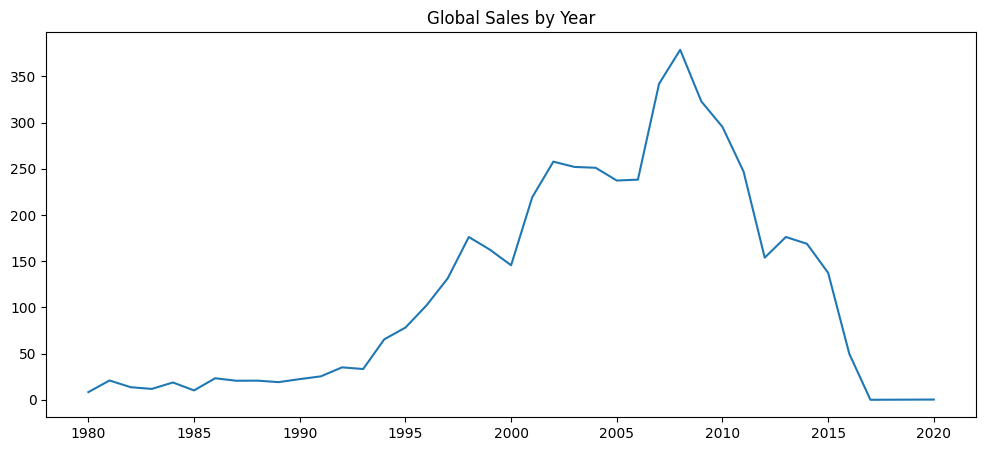

In [94]:
# Global Sales Trend
year_sales = df.groupby('Year')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(year_sales['Year'],year_sales['Global_Sales'])
plt.title("Global Sales by Year")
plt.show()

In [96]:
df.to_csv("clean-video-game-sales.csv",
          sep=",",
          index=False)